In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
with open('1kg_samples.tsv') as f:
    kg_samples = f.readlines()
kg_samples = [x.strip() for x in kg_samples]

with open('ccdg_samples.tsv') as f:
    ccdg_samples = f.readlines()
ccdg_samples = [x.strip() for x in ccdg_samples]

v36 samples: 55705
CCDG samples: 7919
1kG samples: 3212


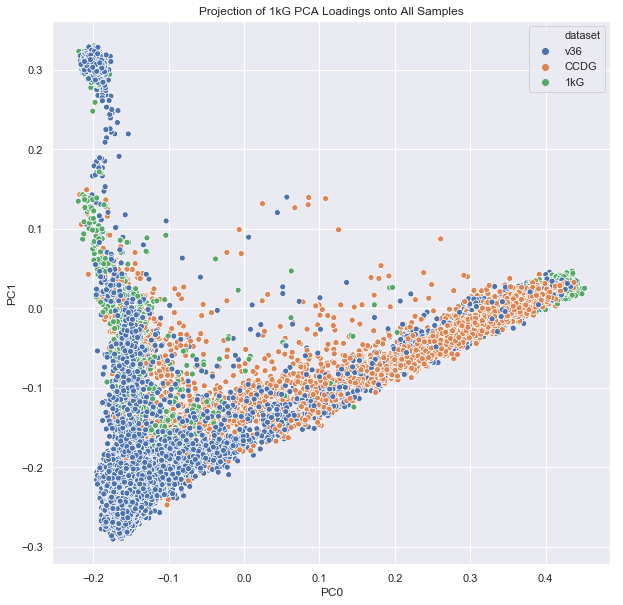

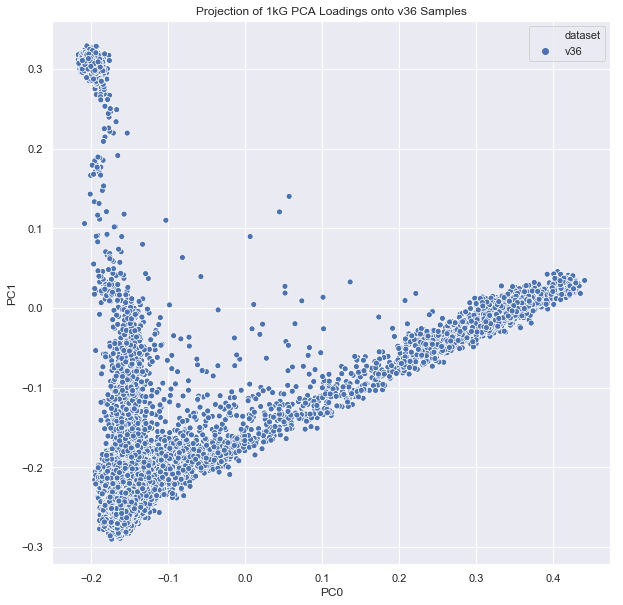

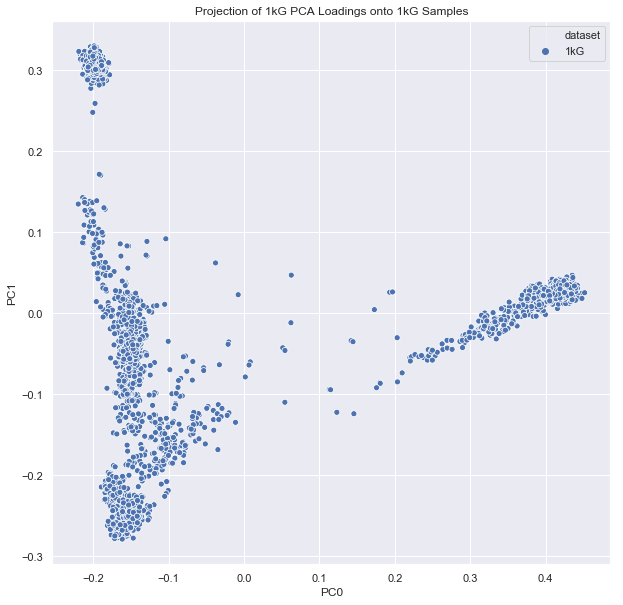

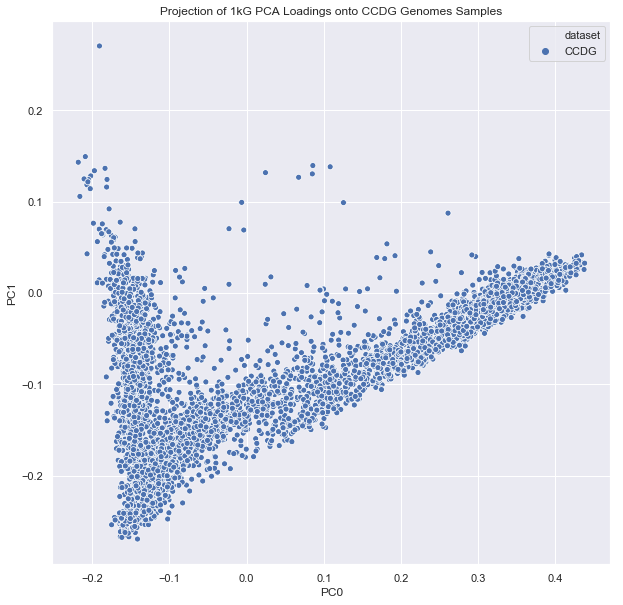

In [3]:
All = pd.read_table('1kg_pca_projections_all_samples.tsv')
All['scores'] = All['scores'].str.replace('[', '').str.replace(']', '')
cols = ['PC'+ str(i) for i in range(10)]
All[cols] = All['scores'].str.split(',', expand=True).astype(np.float64)
cols = ['s'] + cols
All = All[cols]
All.to_csv('1kg_pca_projections_all_samples_clean.tsv', sep='\t', index=False)
All['dataset'] = 'NA'
for i, row in All.iterrows():
    if (All.at[i, 's'] in kg_samples):
        All.at[i, 'dataset'] = '1kG'
    elif (All.at[i, 's'] in ccdg_samples):
        All.at[i, 'dataset'] = 'CCDG'
    else:
        All.at[i, 'dataset'] = 'v36'
CCDG = All[All['dataset'] == 'CCDG']
KG = All[All['dataset'] == '1kG']
v36 = All[All['dataset'] == 'v36']
print("v36 samples: " + str(len(v36)))
print("CCDG samples: " + str(len(CCDG)))
print("1kG samples: " + str(len(KG)))
for dataset, name in zip([All, v36, KG, CCDG], ['All', 'v36', '1kG', 'CCDG Genomes']):
    plt.figure(figsize=(10,10))
    sns.set()
    sns.scatterplot('PC0', 'PC1', hue='dataset', label='', data=dataset).set_title('Projection of 1kG PCA Loadings onto ' + name + ' Samples')

In [29]:
pc_data = pd.read_table('1kg_pca_projections_all_samples_clean.tsv')
kg = pd.read_table('1kgpop.tsv')
#Filter for those samples in our dataset
kg = kg.merge(pc_data, left_on='Sample name', right_on='s')

In [30]:
rfc = RandomForestClassifier()
X_train = kg.columns[3:]
y_train = kg.columns[1]
rfc.fit(kg[X_train], kg[y_train])
predicted_probs = rfc.predict_proba(pc_data[X_train])
pc_data['prediction'] = 'NA'
pops = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS']
for i in range(predicted_probs.shape[0]):
    for j in range(predicted_probs.shape[1]):
        if predicted_probs[i, j] >= 0.8:
            pc_data.at[i, 'prediction'] = pops[j]
pc_data['dataset'] = 'NA'
for i, row in pc_data.iterrows():
    if (pc_data.at[i, 's'] in kg_samples):
        pc_data.at[i, 'dataset'] = '1kG'
    elif (pc_data.at[i, 's'] in ccdg_samples):
        pc_data.at[i, 'dataset'] = 'CCDG'
    else:
        pc_data.at[i, 'dataset'] = 'v36'
CCDG = pc_data[pc_data['dataset'] == 'CCDG']
KG = pc_data[pc_data['dataset'] == '1kG']
v36 = pc_data[pc_data['dataset'] == 'v36']

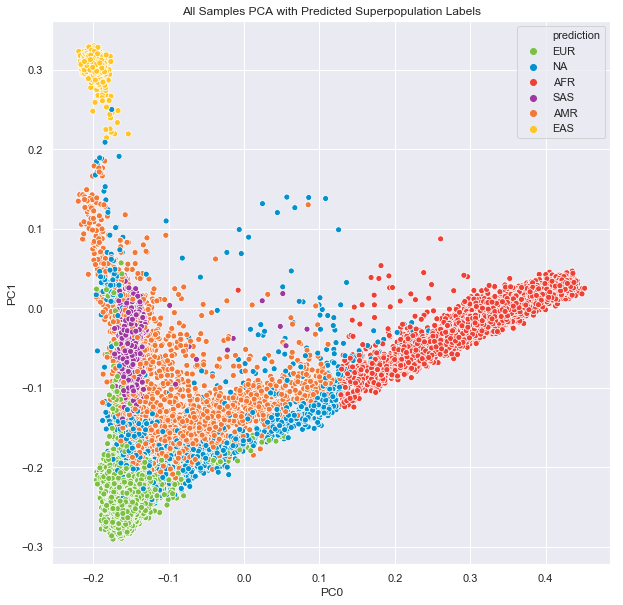

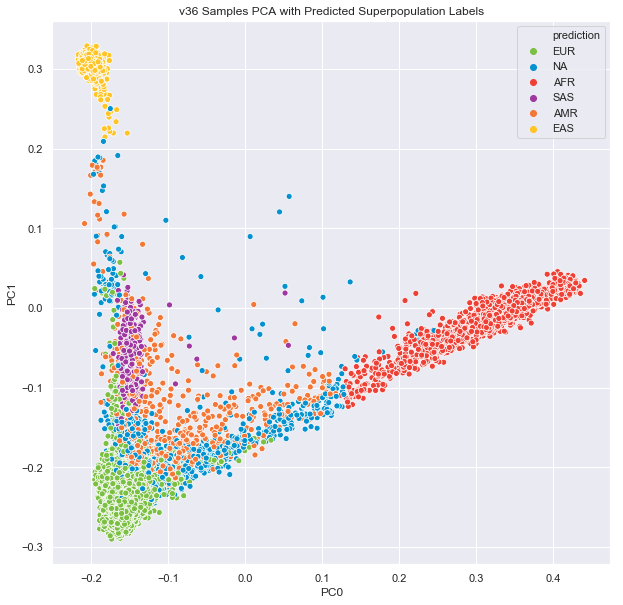

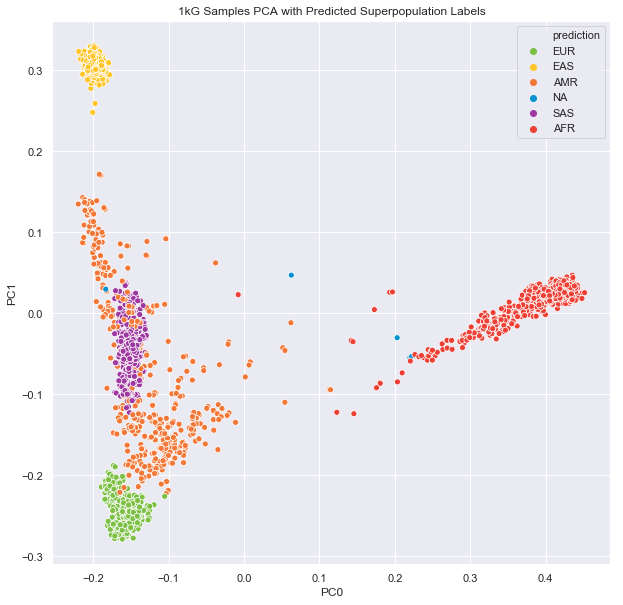

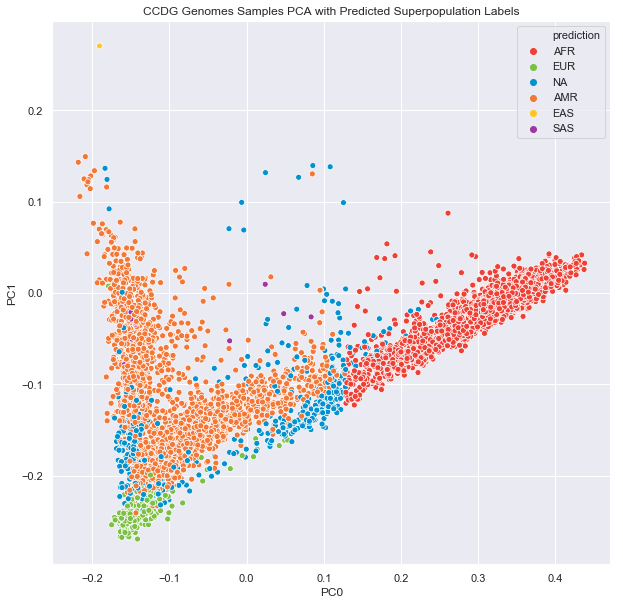

In [31]:
for dataset, name in zip([pc_data, v36, KG, CCDG], ['All', 'v36', '1kG', 'CCDG Genomes']):
    plt.figure(figsize=(10,10))
    sns.set()
    sns.scatterplot('PC0', 'PC1', hue='prediction', data=dataset, palette=dict(AFR="#ee4035", AMR="#f37736", EAS="#ffc425", EUR="#7bc043", NA="#0392cf", SAS="#9e379f")).set_title(name + ' Samples PCA with Predicted Superpopulation Labels')

In [33]:
pops = pd.read_table('v36+ccdg_pop+diagnosis.tsv')

In [38]:
pc_data = pc_data.merge(pops, left_on=['s'], right_on='SAMPLE_ID')

In [42]:
pc_data[pc_data['RACE/ETHNICITY'] == 'AFRICAN AMERICAN'].groupby('prediction').count()

,s,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,dataset,SAMPLE_ID,RACE/ETHNICITY,DIAGNOSIS
prediction,,,,,,,,,,,,,,,
AFR,4337,4337,4337,4337,4337,4337,4337,4337,4337,4337,4337,4337,4337,4337,4337
AMR,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
EUR,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
NA,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219
SAS,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [43]:
pc_data[pc_data['RACE/ETHNICITY'] == 'HISPANIC'].groupby('prediction').count()

,s,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,dataset,SAMPLE_ID,RACE/ETHNICITY,DIAGNOSIS
prediction,,,,,,,,,,,,,,,
AFR,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
AMR,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
EAS,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
EUR,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
NA,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
SAS,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [44]:
pc_data[pc_data['RACE/ETHNICITY'] == 'NFE'].groupby('prediction').count()

,s,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,dataset,SAMPLE_ID,RACE/ETHNICITY,DIAGNOSIS
prediction,,,,,,,,,,,,,,,
AFR,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
AMR,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151
EAS,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
EUR,11661,11661,11661,11661,11661,11661,11661,11661,11661,11661,11661,11661,11661,11661,11661
NA,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487
SAS,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83


In [46]:
pc_data[pc_data['RACE/ETHNICITY'] == 'FIN'].groupby('prediction').count()

,s,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,dataset,SAMPLE_ID,RACE/ETHNICITY,DIAGNOSIS
prediction,,,,,,,,,,,,,,,
AFR,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AMR,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
EUR,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006
NA,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75


In [47]:
pc_data[pc_data['RACE/ETHNICITY'] == 'AJ'].groupby('prediction').count()

,s,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,dataset,SAMPLE_ID,RACE/ETHNICITY,DIAGNOSIS
prediction,,,,,,,,,,,,,,,
AFR,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
AMR,389,389,389,389,389,389,389,389,389,389,389,389,389,389,389
EAS,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
EUR,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830
NA,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720
SAS,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28


In [53]:
pc_data[pc_data['RACE/ETHNICITY'] == 'EAS'].groupby('prediction').count()

,s,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,dataset,SAMPLE_ID,RACE/ETHNICITY,DIAGNOSIS
prediction,,,,,,,,,,,,,,,
EAS,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313
NA,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [55]:
pc_data[pc_data['RACE/ETHNICITY'] == 'PUERTO RICAN'].groupby('prediction').count()

,s,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,dataset,SAMPLE_ID,RACE/ETHNICITY,DIAGNOSIS
prediction,,,,,,,,,,,,,,,
AFR,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
AMR,979,979,979,979,979,979,979,979,979,979,979,979,979,979,979
EUR,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
NA,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
SAS,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [56]:
pc_data[pc_data['RACE/ETHNICITY'] == 'US- NIDDK'].groupby('prediction').count()

,s,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,dataset,SAMPLE_ID,RACE/ETHNICITY,DIAGNOSIS
prediction,,,,,,,,,,,,,,,
AFR,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
AMR,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193
EAS,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
EUR,5786,5786,5786,5786,5786,5786,5786,5786,5786,5786,5786,5786,5786,5786,5786
NA,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
SAS,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42


In [57]:
pc_data[pc_data['RACE/ETHNICITY'] == 'US- MGH PRISM'].groupby('prediction').count()

,s,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,dataset,SAMPLE_ID,RACE/ETHNICITY,DIAGNOSIS
prediction,,,,,,,,,,,,,,,
AFR,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
AMR,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
EAS,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
EUR,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218
NA,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
SAS,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50


In [58]:
pc_data[pc_data['prediction'] == 'EUR'].groupby('RACE/ETHNICITY').count()

,s,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,prediction,dataset,SAMPLE_ID,DIAGNOSIS
RACE/ETHNICITY,,,,,,,,,,,,,,,
AFRICAN AMERICAN,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
AJ,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830
CONTROL,15185,15185,15185,15185,15185,15185,15185,15185,15185,15185,15185,15185,15185,15185,15185
FC,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884
FIN,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006
HISPANIC,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
NFE,11661,11661,11661,11661,11661,11661,11661,11661,11661,11661,11661,11661,11661,11661,11661
PUERTO RICAN,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
US- MGH PRISM,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218
